# Reinforcement Learnig Part1

Introduction

 In RL, an agent interacts with an environment by taking actions that change its state, and the agent receives rewards based on these actions' outcomes. The goal is for the agent to learn optimal strategies that maximize cumulative rewards through a trial-and-error process. This dynamic interaction between the agent and the environment distinguishes RL from the more static nature of Supervised and Unsupervised Learning, making it ideal for applications like robotics and game playing where decision-making is key.
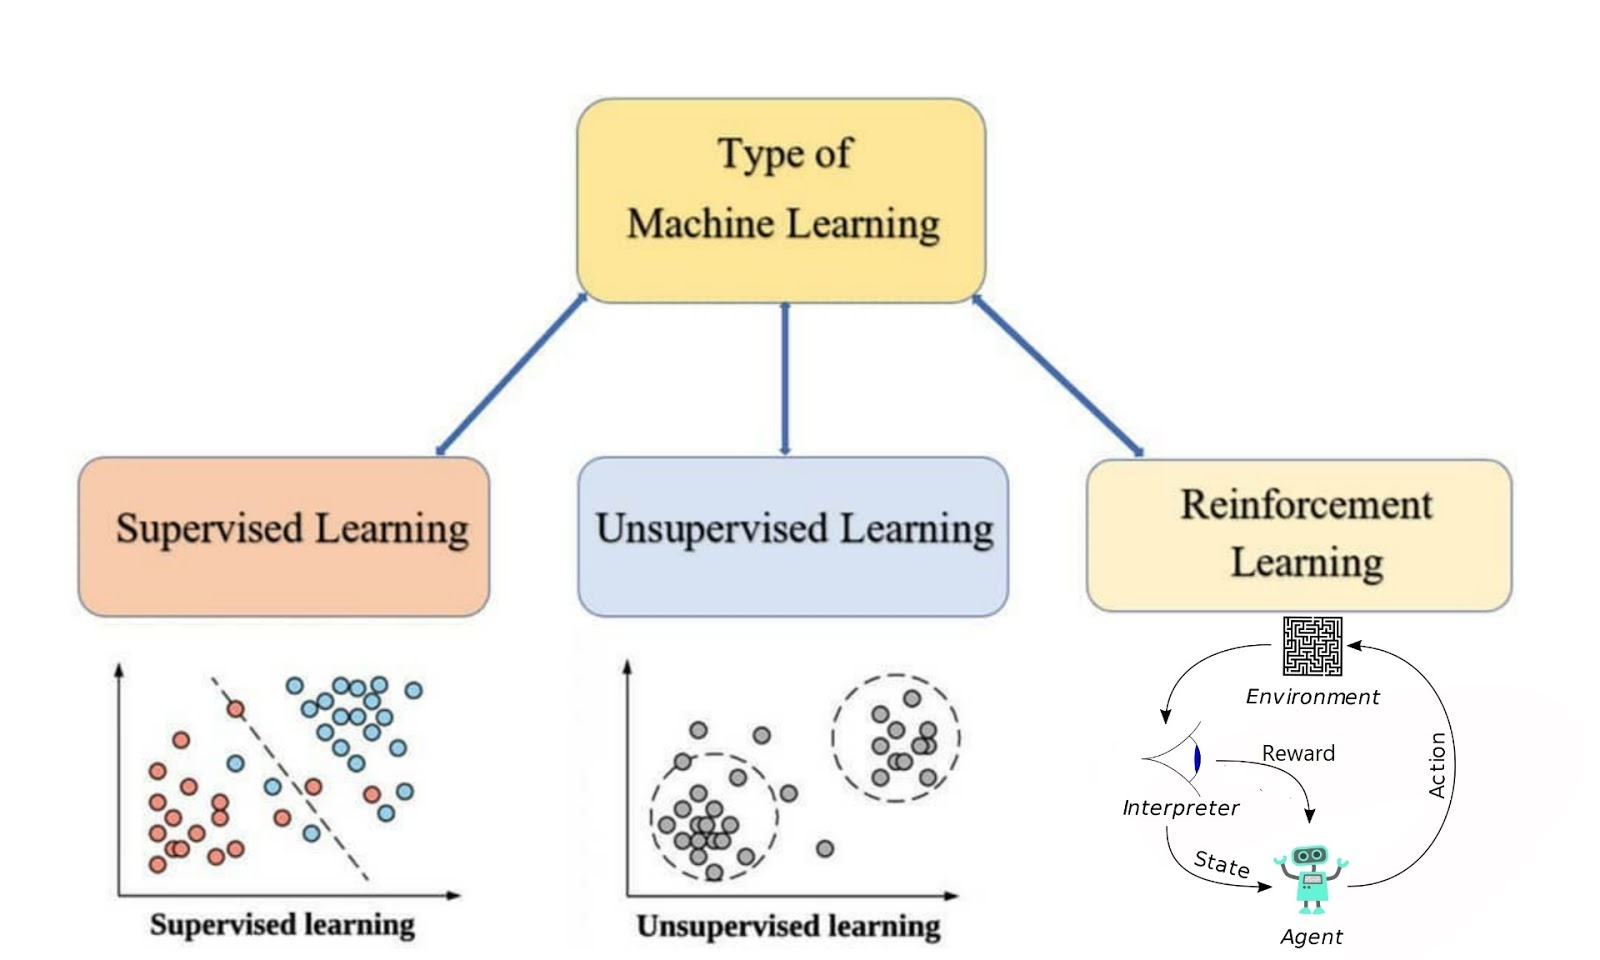

**Elements of Reinforcment Learning**
1. Policy:(what to do)
    - Maps states to actions to be taken in those states
    - Lookup table or function
    - Stochastic or deterministic
2. Reward: (what is the envirnments payoff)
    - Rewards are numbers indicating the desirability of a state
    - Provided by the environment
    - May be stochastic or deterministic
3. Value:
    - Values are numbers indicating the long-term desirability of a state
    - The total amount of reward the agent can expect to accumulate, starting from that state
    - Estimated from sequences of observed actions and rewards

4. Model:
    - State transitions: stochastic or deterministic

**Markov decision process**

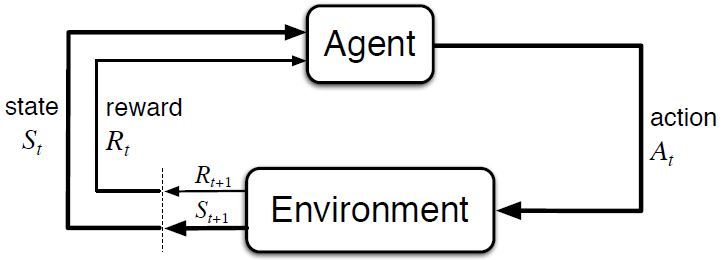

The MDP diagram

An MDP is characterized by a four-tuple $(S; A; R; P)$, where:
* $S$ represents a state space
* $A$ represents an action space
* $R_a(x,y)$ is the immediate reward
* $P_a(x,y)$ is transition probability

There are some other elements for calculating value:
* $γ$ represents discount factor (usually $0\leq\gamma\leq1)$
* $H$ Represents hirizon, finite: $H\in \mathbb{N}$ and infinite: $H=∞$

Our Goal in RL:
$$\max_\pi E[\sum_{t=0}^{H}γ^{t}R(S_t,A_t,S_{t+1})|π]$$

**Bellman's equation**
$$ V^*=\max_{a \in A}\sum_{y\in S}P_a(x,y)(R_a(x,y)+γV^*(y)) ,∀ x ∈ S $$

Using Bellman's equation to update policy:

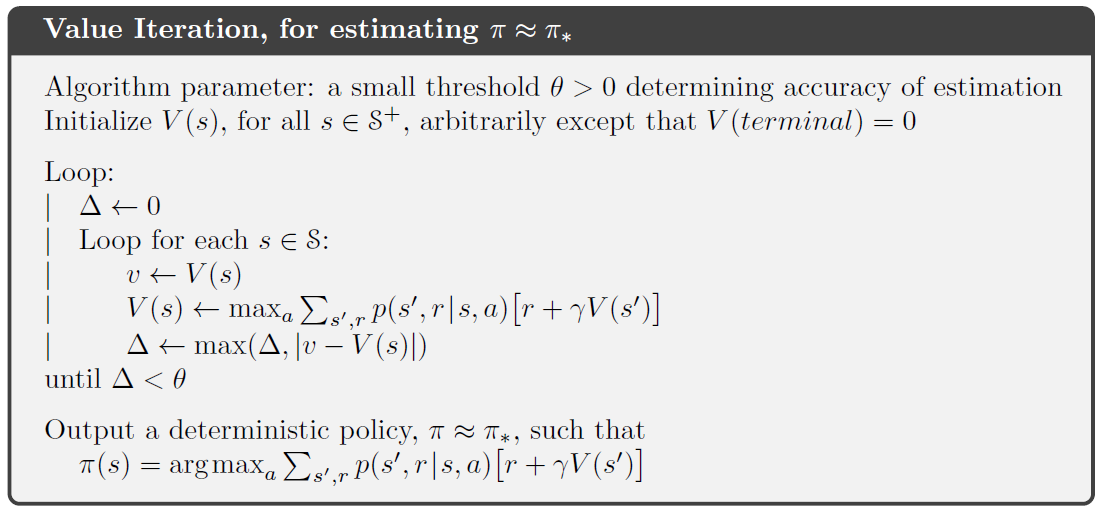

Why it convergece?

The value function for a finite horizon H converges to the infinite-horizon value function as H becomes very large, because the effect of future rewards beyond a certain point becomes negligible.

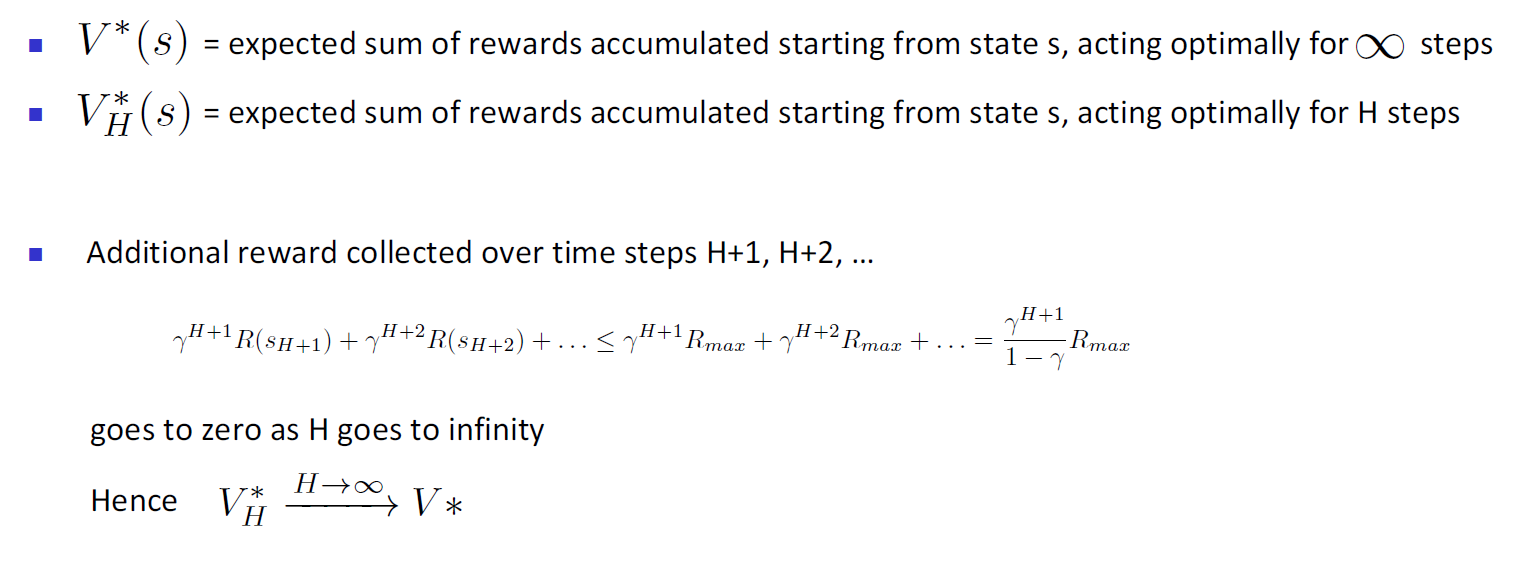

Why we can use small $Δ$ for updating the policy?

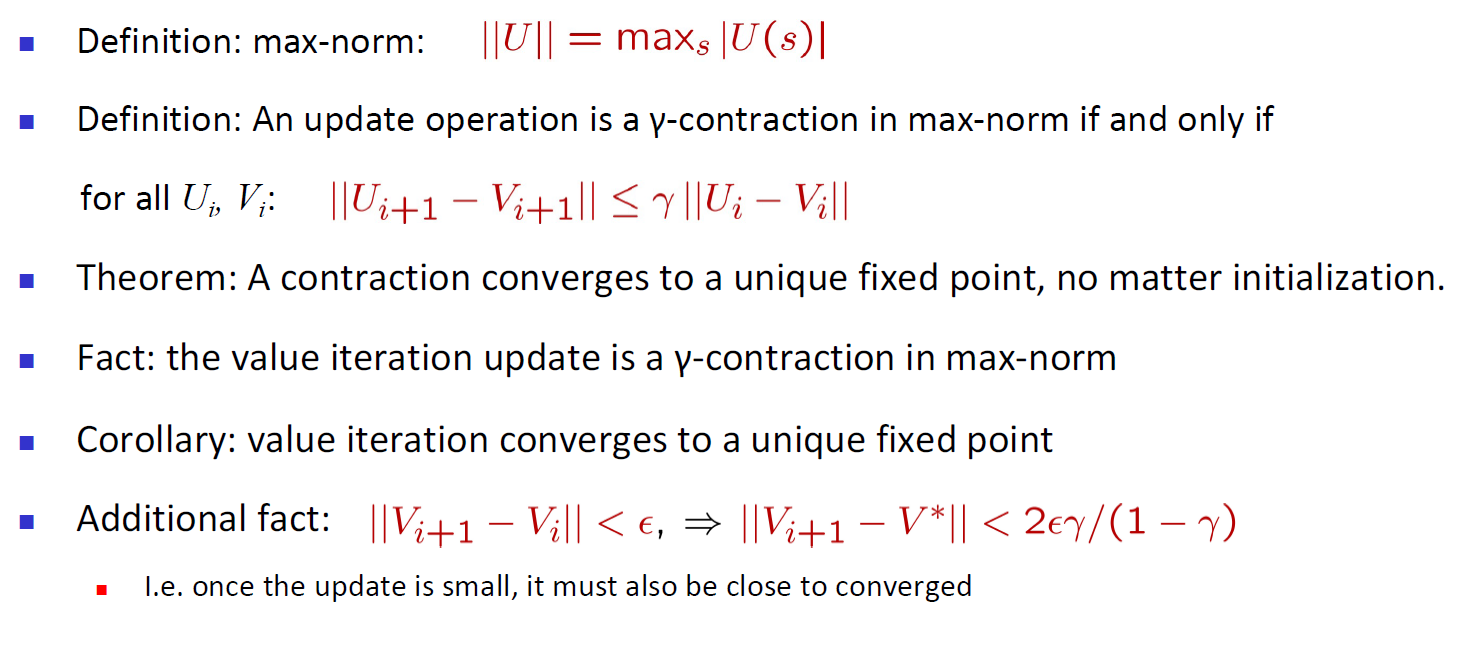

Example:

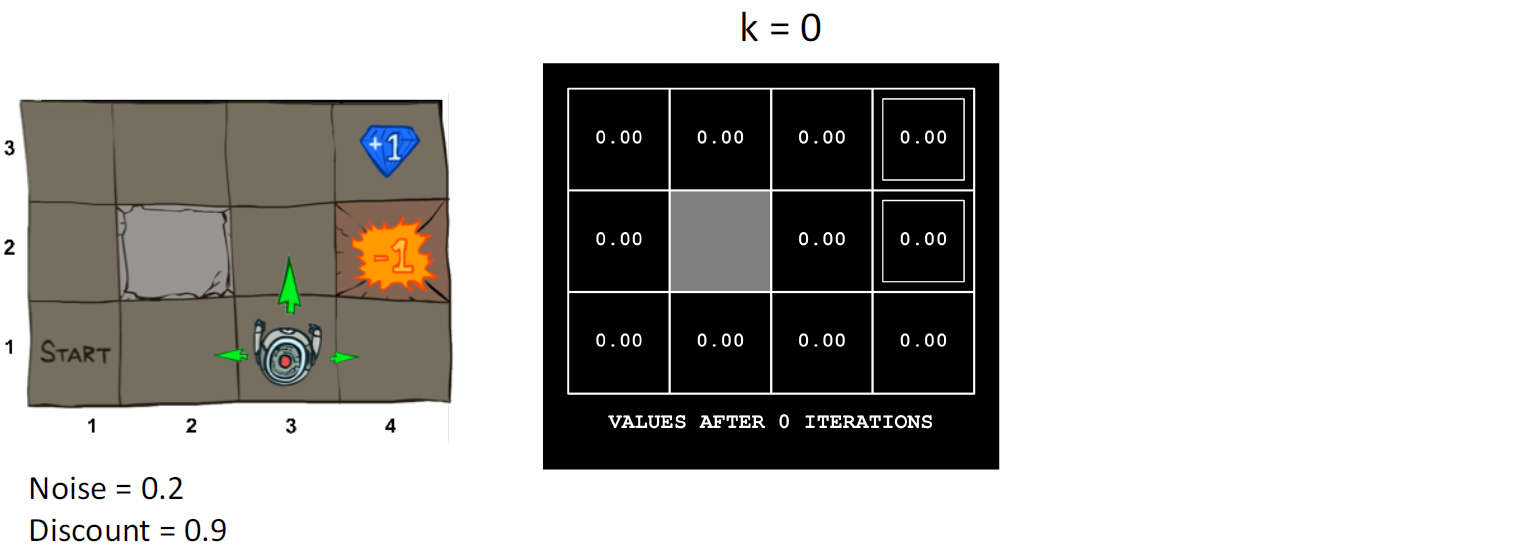

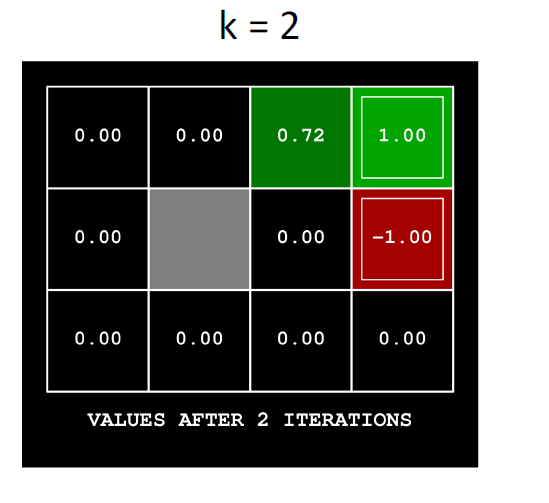
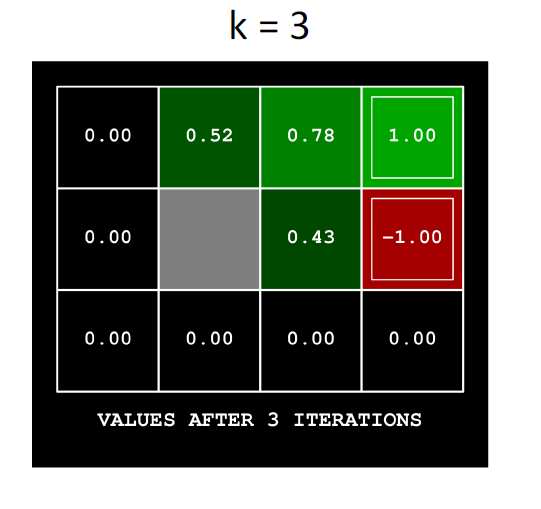
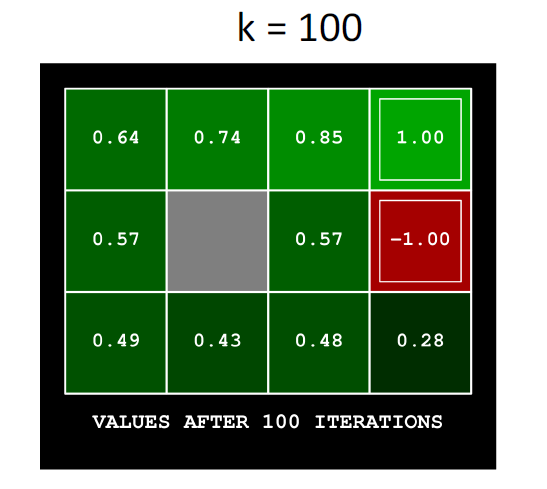

**Q-value**

$Q^*(s, a) =$ expected utility starting in s, taking action a, and (thereafter) acting optimally

Bellman Equation:
$$Q^*(s,a)=\sum_{s'}P(S'|s,a)(R(s,a,s')+γ\max_{a'}Q^*(s',a'))$$


Q-Value Iteration:
$$Q^*(s,a)⟵\sum_{s'}P(S'|s,a)(R(s,a,s')+γ\max_{a'}Q^*(s',a'))$$

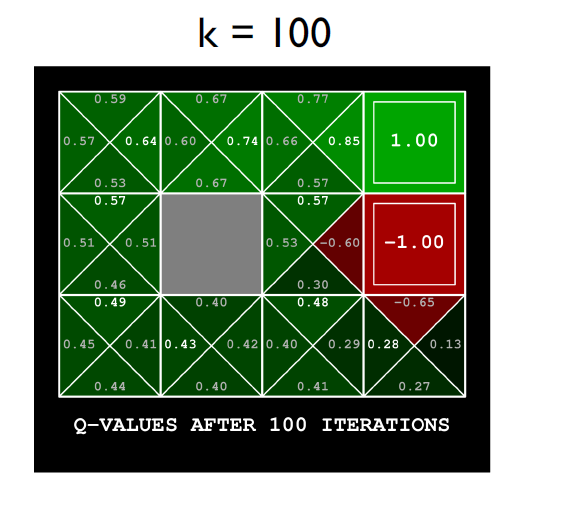

**If our envirnment is stochastic, what is the solution?**

The solution is policy iteration:
- performs policy evaluation for this stochastic policy.
- Takes the fixed policy until it converges and updates the policy if it's better

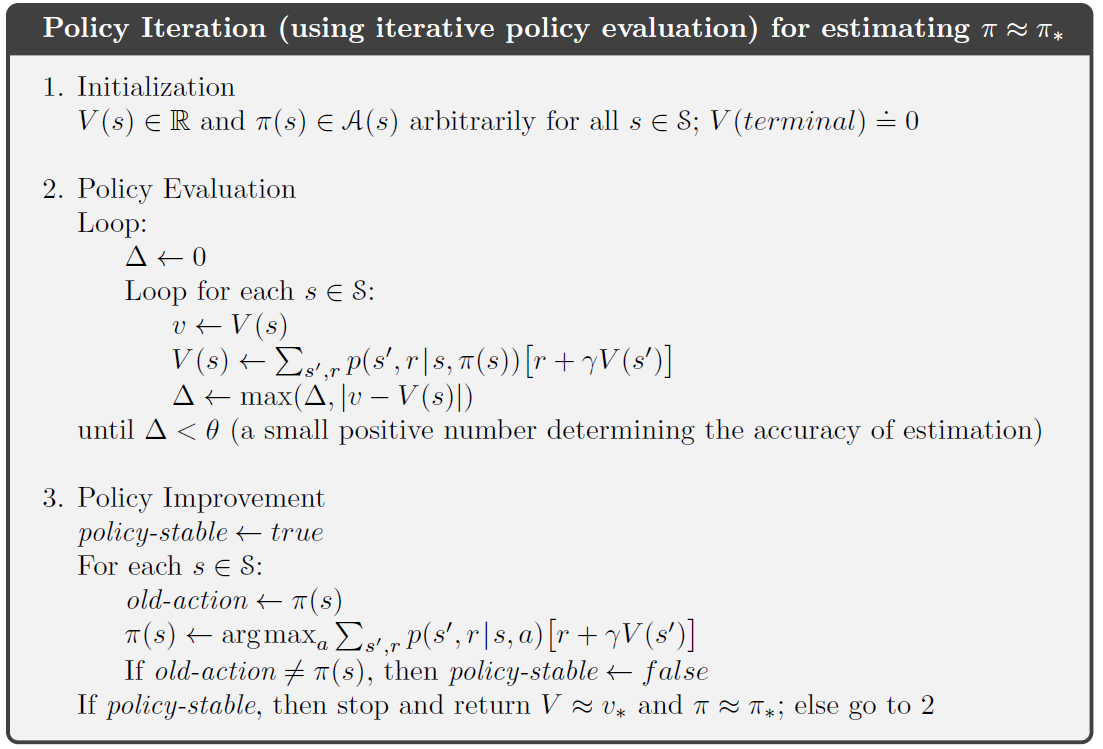

#Grid World Example

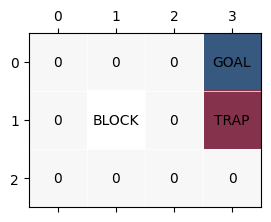

In [2]:
import matplotlib.pyplot as plt
import numpy as np
GOAL = (0, 3)
TRAP = (1, 3)
BLOCK = (1, 1)
STATES = {(i, j) for i in range(3) for j in range(4)}
ACTIONS = {"UP": (-1, 0), "DOWN ": (1, 0), "LEFT": (0, -1), "RIGHT": (0, 1)}

def reward(state):
    if state == GOAL:
        return 1
    elif state == TRAP:
        return -1
    elif state == BLOCK:
        return np.nan
    else:
        return 0

def plot_values(values):
    fig, ax = plt.subplots(figsize=(3, 4))
    vals = []
    for i in range(3):
        row = []
        for j in range(4):
            row.append(values[(i, j)])
        vals.append(row)
    ax.matshow(vals, cmap="RdBu", alpha=0.8)
    for i in range(3):
        for j in range(4):
            ax.plot([j-0.5, j-0.5], [i-0.5, i+0.5], c="white", linewidth=0.5)
            ax.plot([j-0.5, j+0.5], [i-0.5, i-0.5], c="white", linewidth=0.5)
            if (i, j) == GOAL:
                ax.text(j, i, "GOAL", va="center", ha="center")
            elif (i, j) == TRAP:
                ax.text(j, i, "TRAP", va="center", ha="center")
            elif (i, j) == BLOCK:
                ax.text(j, i, "BLOCK", va="center", ha="center")
            else:
                ax.text(j, i, str(round(vals[i][j], 2)), va="center", ha="center")
    plt.show()

values = {state:reward(state) for state in STATES}
plot_values(values)

In [4]:
def transition(state, action):
    if state in {GOAL, TRAP}:
        return state
    step = ACTIONS[action]
    next_state = (state[0] + step[0], state[1] + step[1])
    if next_state == BLOCK:
        return state
    if next_state in STATES:
        return next_state
    return state

start_point = (0, 0)
for action in ACTIONS:
    print(start_point, action, transition(start_point, action))

(0, 0) UP (0, 0)
(0, 0) DOWN  (1, 0)
(0, 0) LEFT (0, 0)
(0, 0) RIGHT (0, 1)


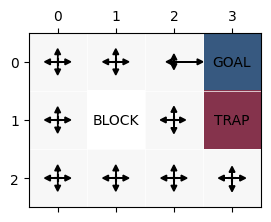

In [5]:
def update_policy(values, noise= 0.2):
    policy = {}
    for state in STATES:
        policy[state] = {}
        if state in {GOAL, TRAP, BLOCK}:
            continue
        max_val = float("-inf")

        for action, action_val in ACTIONS.items():
            next_state = transition(state, action)
            val = values[next_state]
            policy[state][action] = val
            if val > max_val:
                max_val = val

        count_max = sum(1 for val in policy[state].values() if val == max_val)
        count_other = len(policy[state]) - count_max
        for action, val in policy[state].items():
            if val == max_val:
                policy[state][action] = 1/count_max
                if count_other > 0:
                    policy[state][action] *= (1-noise)
            elif count_other > 0:
                policy[state][action] = noise/count_other

    return policy


def plot_policy(values):
    policy = update_policy(values)
    fig, ax = plt.subplots(figsize=(3, 4))
    vals = np.zeros((3, 4))
    for state in policy.keys():
        ax.plot([state[1]-0.5, state[1]-0.5], [state[0]-0.5, state[0]+0.5], c="white", linewidth=0.5)
        ax.plot([state[1]-0.5, state[1]+0.5], [state[0]-0.5, state[0]-0.5], c="white", linewidth=0.5)
        vals[state[0]][state[1]] = values[state]
        if state == GOAL:
            ax.text(state[1], state[0], "GOAL", va="center", ha="center")
            continue
        if state == TRAP:
            ax.text(state[1], state[0], "TRAP", va="center", ha="center")
            continue
        if state == BLOCK:
            vals[state[0]][state[1]] = np.nan
            ax.text(state[1], state[0], "BLOCK", va="center", ha="center")
            continue
        ax.scatter(state[1], state[0], c="black", marker="+")
        for action in policy[state].keys():
            arrow_len = policy[state][action]/2
            if arrow_len == 0:
                continue
            if action == "UP":
                ax.arrow(state[1], state[0],
                        0, -arrow_len,
                        head_width=0.1, head_length=0.1, fc='k', ec='k')
            elif action == "DOWN ":
                ax.arrow(state[1], state[0],
                        0, arrow_len,
                        head_width=0.1, head_length=0.1, fc='k', ec='k')
            elif action == "LEFT":
                ax.arrow(state[1], state[0],
                        -arrow_len, 0,
                        head_width=0.1, head_length=0.1, fc='k', ec='k')
            elif action == "RIGHT":
                ax.arrow(state[1], state[0],
                        arrow_len, 0,
                        head_width=0.1, head_length=0.1, fc='k', ec='k')
    ax.matshow(vals, cmap="RdBu", alpha=0.8)
    plt.show()

policy = update_policy(values)
plot_policy(values)

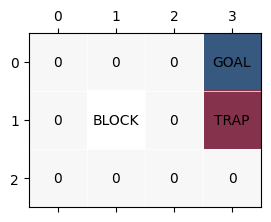

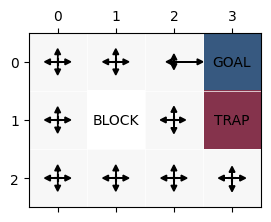

In [6]:
GAMMA = 0.9

def value_iteration(policy, iterations=100):
    values = {state:reward(state) for state in STATES}
    for _ in range(iterations):
        new_values = {state:0 for state in STATES}
        for state in STATES:
            if state in {GOAL, TRAP, BLOCK}:
                new_values[state] = reward(state)
                continue
            val = 0
            for action, p in policy[state].items():
                next_state = transition(state, action)
                val += p * (reward(state) + GAMMA * values[next_state])
            new_values[state] = max(val, 0)
        values = new_values
        policy = update_policy(values)

    return values, policy

policy = update_policy(values)
utilities, policy = value_iteration(policy, 0)
plot_values(utilities)
plot_policy(utilities)

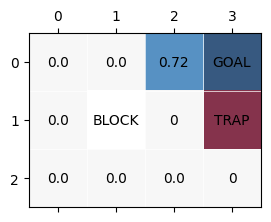

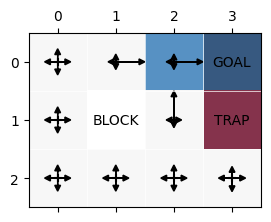

In [7]:
#1 iterations
utilities, policy = value_iteration(policy, 1)
plot_values(utilities)
plot_policy(utilities)

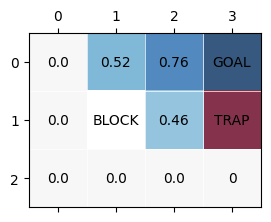

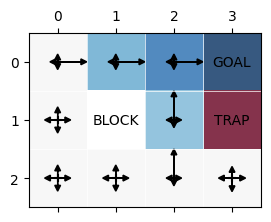

In [8]:
#2 iterations
utilities, policy = value_iteration(policy, 2)
plot_values(utilities)
plot_policy(utilities)

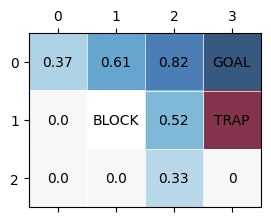

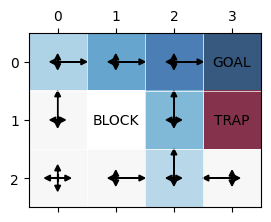

In [9]:
#3 iterations
utilities, policy = value_iteration(policy, 3)
plot_values(utilities)
plot_policy(utilities)

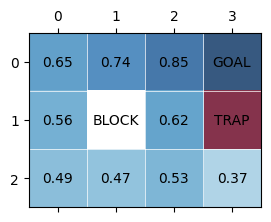

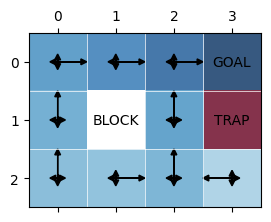

In [10]:
#100 iterations
utilities, policy = value_iteration(policy, 100)
plot_values(utilities)
plot_policy(utilities)

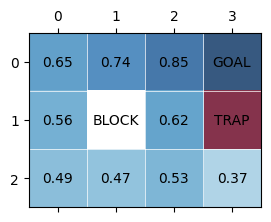

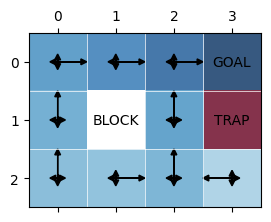

In [11]:
def bellman_optimization(epsilon= 0.00001 , max_iter = 1000):
    def general_reward(values):
        return sum(values.values())

    values = {state: 0 for state in STATES}
    policy = update_policy(values)
    R = float("inf")
    delta = float("inf")
    counter = 0
    while delta > epsilon or counter < max_iter:
        new_values = {state: 0 for state in STATES}
        for state in STATES:
            if state in {GOAL, TRAP, BLOCK}:
                new_values[state] = reward(state)
                continue
            val = 0
            for action, p in policy[state].items():
                next_state = transition(state, action)
                val += p * (reward(state) + GAMMA * values[next_state])
            new_values[state] = val
        values = new_values
        policy = update_policy(values)
        delta = abs(R - general_reward(values))
        R = general_reward(values)
        counter += 1
    return values, policy

utilities, policy = bellman_optimization()
plot_values(utilities)
plot_policy(utilities)

**Working with Q-Values**

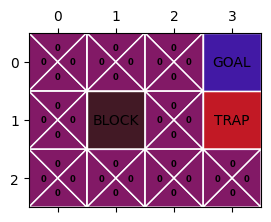

In [12]:
q_values = {state: {action: 0 for action in ACTIONS} for state in STATES}

def plot_q_values(q_values):
    def color_map(value, min= -1, max= 1, alpha= 0.5):
        if value < min:
            value = min
        if value > max:
            value = max
        color = (max - value) / (max - min)
        return (color, 0, 1 - color, alpha)

    fig, ax = plt.subplots(figsize=(3, 4))
    vals = np.zeros((3, 4))
    ax.matshow(vals, cmap="RdBu", alpha=0.8)
    for state in q_values.keys():
        if state in {GOAL, TRAP, BLOCK}:
            rectangle = plt.Polygon([[state[1]-0.5, state[0]-0.5],
                                    [state[1]+0.5, state[0]-0.5],
                                    [state[1]+0.5, state[0]+0.5],
                                    [state[1]-0.5, state[0]+0.5]],
                                    closed=True,
                edgecolor="white", facecolor=color_map(reward(state)))
            ax.add_artist(rectangle)
            continue
        q_values[state].update({action: round(val, 2)
            for action, val in q_values[state].items()})


    for state in q_values.keys():
        ax.plot([state[1]-0.5, state[1]+0.5], [state[0]-0.5, state[0]-0.5],
            c="white", linewidth=0.5)
        ax.plot([state[1]+0.5, state[1]+0.5], [state[0]-0.5, state[0]+0.5],
            c="white", linewidth=0.5)

        if state == GOAL:
            ax.text(state[1], state[0], "GOAL", va="center", ha="center")
            continue
        if state == TRAP:
            ax.text(state[1], state[0], "TRAP", va="center", ha="center")
            continue
        if state == BLOCK:
            ax.text(state[1], state[0], "BLOCK", va="center", ha="center")
            continue

        font_size = 6
        max_val = max(q_values[state].values())
        for action, val in q_values[state].items():
            bold = "bold" if val == max_val else "normal"
            if action == "UP":
                triangle = plt.Polygon([[state[1], state[0]],
                                    [state[1]+0.5, state[0]-0.5],
                                    [state[1]-0.5, state[0]-0.5]],
                                    closed=True,
                                    edgecolor="white",
                                    facecolor=color_map(val))
                ax.add_artist(triangle)
                ax.text(state[1], state[0]-0.25, str(round(val, 2)),
                    va="center", ha="center", fontsize=font_size, fontweight=bold)
            elif action == "DOWN ":
                triangle = plt.Polygon([[state[1], state[0]],
                                    [state[1]+0.5, state[0]+0.5],
                                    [state[1]-0.5, state[0]+0.5]],
                                    closed=True,
                                    edgecolor="white",
                                    facecolor=color_map(val))
                ax.add_artist(triangle)
                ax.text(state[1], state[0]+0.25, str(round(val, 2)),
                    va="center", ha="center", fontsize=font_size, fontweight=bold)
            elif action == "LEFT":
                triangle = plt.Polygon([[state[1], state[0]],
                                    [state[1]-0.5, state[0]+0.5],
                                    [state[1]-0.5, state[0]-0.5]],
                                    closed=True,
                                    edgecolor="white",
                                    facecolor=color_map(val))
                ax.add_artist(triangle)
                ax.text(state[1]-0.25, state[0], str(round(val, 2)),
                    va="center", ha="center", fontsize=font_size, fontweight=bold)
            elif action == "RIGHT":
                triangle = plt.Polygon([[state[1], state[0]],
                                    [state[1]+0.5, state[0]+0.5],
                                    [state[1]+0.5, state[0]-0.5]],
                                    closed=True,
                                    edgecolor="white",
                                    facecolor=color_map(val))
                ax.add_artist(triangle)
                ax.text(state[1]+0.25, state[0], str(round(val, 2)),
                    va="center", ha="center", fontsize=font_size, fontweight=bold)

    plt.show()

plot_q_values(q_values)

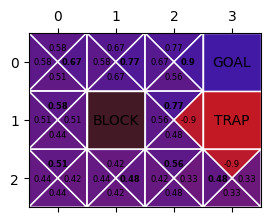

In [13]:
def q_learning(epsilon= 0.00001 , max_iter = 1000):
    q_values = {state: {action: 0 for action in ACTIONS} for state in STATES}
    def general_reward(values):
        return sum(values.values())

    values = {state: 0 for state in STATES}
    policy = update_policy(values)
    R = float("inf")
    delta = float("inf")
    counter = 0
    while delta > epsilon or counter < max_iter:
        new_values = {state: 0 for state in STATES}
        for state in STATES:
            if state in {GOAL, TRAP, BLOCK}:
                new_values[state] = reward(state)
                continue
            val = 0
            for action, p in policy[state].items():
                next_state = transition(state, action)
                q_values[state][action] = reward(state) + GAMMA * values[next_state]
                val += p * (reward(state) + GAMMA * values[next_state])
            new_values[state] = val
        values = new_values
        policy = update_policy(values)
        delta = abs(R - general_reward(values))
        R = general_reward(values)
        counter += 1
    return q_values, policy

q_values, policy = q_learning()
plot_q_values(q_values)

# Code Implementation for Jack's rental car


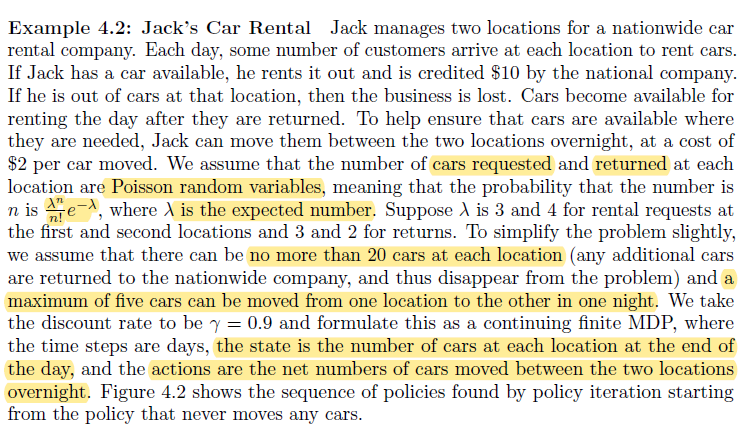

the states represent the number of cars at each location, the actions are the net number of cars moved between locations overnight, and the rewards are calculated based on the rental income and moving costs.

In [ ]:
import numpy as np
from scipy.stats import poisson, norm
import matplotlib.pyplot as plt
from IPython import display
import matplotlib.pylab as plt
import time

In [ ]:
class Poisson(object):
    cache_pmf = {}
    cache_sf = {}
    cache = {}
    MAX_CUTOFF = 25

    @classmethod
    def pmf_series(cls, mu, cutoff):
        cutoff=int(cutoff)
        assert isinstance(mu, int), "mu should be an integer."
        assert isinstance(cutoff, int), "cutoff should be an integer"

        if (mu, cutoff) not in cls.cache:
            cls._calculate_pmf_series(mu, cutoff)

        return cls.cache[(mu, cutoff)]

    @classmethod
    def _calculate_pmf_series(cls, mu, cutoff):

        if mu not in cls.cache_pmf:
            print("Calculate poisson ...")
            cls.cache_pmf[mu] = poisson.pmf(np.arange(cls.MAX_CUTOFF + 1), mu)
            cls.cache_sf[mu] = poisson.sf(np.arange(cls.MAX_CUTOFF + 1), mu)

        out = np.copy(cls.cache_pmf[mu][:cutoff+1])
        out[-1] += cls.cache_sf[mu][cutoff]

        cls.cache[(mu, cutoff)] = out

In [ ]:
deltas=[]
class PolicyIterationSolver(object):

    capacity = 20
    rental_reward = 10.
    moving_cost = 2.
    max_moving = 5

    bad_action_cost = 0.

    request_mean_G1 = 4
    return_mean_G1 = 5
    request_mean_G2 = 5
    return_mean_G2 = 4

    discount = 0.9

    PolicyEvaluationError = 0.01

    policy = None
    value = None

    def __init__(self):
        self.policy = np.zeros([self.capacity + 1]*2, int)
        self.value = np.zeros([self.capacity + 1]*2)

        self._reward1 = self.expected_rental_reward(self.request_mean_G1)
        self._reward2 = self.expected_rental_reward(self.request_mean_G2)
        print(self._reward1)
        assert self.bad_action_cost >= 0

    def bellman(self, action, s1, s2):
        transp1 = self.transition_probabilty(s1, self.request_mean_G1, self.return_mean_G1, -action)
        transp2 = self.transition_probabilty(s2, self.request_mean_G2, self.return_mean_G2, action)
        transp = np.outer(transp1, transp2)
        # raise ValueError(transp1)
        return self._reward1[s1] + self._reward2[s2] - self.expected_moving_cost(s1, s2, action) + \
               self.discount * sum((transp * self.value).flat)

    # policy evaluation
    def policy_evaluation(self):
        ''' Keep pocliy fixed and update value. '''
        while True:
            diff = 0.
            it = np.nditer([self.policy], flags=['multi_index'])

            while not it.finished:
                action = it[0]
                s1, s2 = it.multi_index

                _temp = self.value[s1, s2]

                self.value[s1, s2] = self.bellman(action=action, s1=s1, s2=s2)
                diff = max(diff, abs(self.value[s1, s2] - _temp))
                # raise ValueError(diff)

                it.iternext()

            print(diff)
            deltas.append(diff)
            if diff < self.PolicyEvaluationError:
                break

    def policy_update(self):
        is_policy_changed = False

        it = np.nditer([self.policy], flags=['multi_index'])
        while not it.finished:
            s1, s2 = it.multi_index

            _max_val = -1
            _pol = None

            for act in range(int(-self.max_moving), int(self.max_moving + 1)):
                _val = self.bellman(action=act, s1=s1, s2=s2)
                if _val > _max_val:
                    _max_val = _val
                    _pol = act

            if self.policy[s1, s2] != _pol:
                is_policy_changed = True
                self.policy[s1, s2] = _pol

            it.iternext()

        return is_policy_changed

    def expected_moving_cost(self, s1, s2, action):
        if action == 0:
            return 0.

        # moving from state s1 into state s2
        if action > 0:
            p = self.transition_probabilty(s1, self.request_mean_G1, self.return_mean_G1)
            cost = self._gen_move_cost_array(action)
            return cost.dot(p)

        # moving from state s2 into state s1
        p = self.transition_probabilty(s2, self.request_mean_G2, self.return_mean_G2)
        cost = self._gen_move_cost_array(action)
        return cost.dot(p)

    def _gen_move_cost_array(self, action):

        _action = abs(action)

        # Don't punish bad action:
        if self.bad_action_cost == 0:
            cost = np.asarray(
                [ii if ii < _action else _action for ii in range(self.capacity+1)]
            ) * self.moving_cost

        # bad action is punished
        else:
            cost = np.asarray(
                [self.bad_action_cost if ii < _action else _action for ii in range(self.capacity + 1)]
            ) * self.moving_cost
        return cost


    @classmethod
    def expected_rental_reward(cls, expected_request):
        return np.asarray([cls._state_reward(s, expected_request) for s in range(cls.capacity + 1)])

    @classmethod
    def _state_reward(cls, s, mu):
        rewards = cls.rental_reward * np.arange(s + 1)
        p = Poisson.pmf_series(mu, cutoff=s)
        # p = Normal.pdf_series(mu=mu,sigma=1,cutoff=s+1)
        return rewards.dot(p)

    def transition_probabilty(self, s, req, ret, action=0):

        _ret_sz = self.max_moving + self.capacity

        p_req = Poisson.pmf_series(req, s)
        p_ret = Poisson.pmf_series(ret, _ret_sz)
        # p_req = Normal.pdf_series(mu=req,sigma=1,cutoff=s)
        # p_ret = Normal.pdf_series(mu=ret,sigma=1,cutoff=_ret_sz)
        p = np.outer(p_req, p_ret)

        transp = np.asarray([p.trace(offset) for offset in range(-s, _ret_sz + 1)])

        assert abs(action) <= self.max_moving, "action can be large than %s." % self.max_moving

        # No cars are being moved
        if action == 0:
            transp[20] += sum(transp[21:])
            return transp[:21]

        # Move cars from Garage 1 to Garage 2
        if action > 0:
            transp[self.capacity-action] += sum(transp[self.capacity-action+1:])
            transp[self.capacity-action+1:] = 0

            return np.roll(transp, shift=action)[:self.capacity+1]

        # Move cars from Garage 2 to Garage 1
        action = -action
        transp[action] += sum(transp[:action])
        transp[:action] = 0

        transp[action+self.capacity] += sum(transp[action+self.capacity+1:])
        transp[action+self.capacity+1:] = 0

        return np.roll(transp, shift=-action)[:self.capacity+1]

    def policy_iteration(self):
        self.policy_evaluation()
        while self.policy_update():
            self.policy_evaluation()

In [ ]:
deltas=[]
class ValueIterationSolver(object):
    capacity = 20
    rental_reward = 10.
    moving_cost = 2.
    max_moving = 5

    bad_action_cost = 0.

    request_mean_G1 = 4
    request_mean_G2 = 5
    return_mean_G1 = 5
    return_mean_G2 = 4

    discount = 0.8
    ValueIterationError = 0.01

    policy = None
    value = None

    def __init__(self):
        self.policy = np.zeros([self.capacity + 1] * 2, int)
        self.value = np.zeros([self.capacity + 1] * 2)

        self._reward1 = self.expected_rental_reward(self.request_mean_G1)
        self._reward2 = self.expected_rental_reward(self.request_mean_G2)
        print(self._reward1)
        assert self.bad_action_cost >= 0

    def bellman(self, action, s1, s2):
        transp1 = self.transition_probabilty(s1, self.request_mean_G1, self.return_mean_G1, -action)
        transp2 = self.transition_probabilty(s2, self.request_mean_G2, self.return_mean_G2, action)
        transp = np.outer(transp1, transp2)
        return self._reward1[s1] + self._reward2[s2] - self.expected_moving_cost(s1, s2, action) + \
               self.discount * sum((transp * self.value).flat)

    def value_iteration(self):

        while True:
            diff = 0.
            for s1 in range(self.capacity + 1):
                for s2 in range(self.capacity + 1):
                    _temp = self.value[s1, s2]

                    _max_val = -1
                    for act in range(-self.max_moving, self.max_moving + 1):
                        _val = self.bellman(action=act, s1=s1, s2=s2)
                        if _val > _max_val:
                            _max_val = _val
                            self.policy[s1, s2] = act

                    self.value[s1, s2] = _max_val
                    diff = max(diff, abs(self.value[s1, s2] - _temp))

            print(diff)
            deltas.append(diff)
            if diff < self.ValueIterationError:
                break

    def expected_moving_cost(self, s1, s2, action):
        if action == 0:
            return 0.

        # moving from state s1 into state s2
        if action > 0:
            p = self.transition_probabilty(s1, self.request_mean_G1, self.return_mean_G1)
            cost = self._gen_move_cost_array(action)
            return cost.dot(p)

        # moving from state s2 into state s1
        p = self.transition_probabilty(s2, self.request_mean_G2, self.return_mean_G2)
        cost = self._gen_move_cost_array(action)
        return cost.dot(p)

    def _gen_move_cost_array(self, action):
        _action = abs(action)

        # Don't punish bad action:
        if self.bad_action_cost == 0:
            cost = np.asarray(
                [ii if ii < _action else _action for ii in range(self.capacity + 1)]
            ) * self.moving_cost

        # bad action is punished
        else:
            cost = np.asarray(
                [self.bad_action_cost if ii < _action else _action for ii in range(self.capacity + 1)]
            ) * self.moving_cost
        return cost

    @classmethod
    def expected_rental_reward(cls, expected_request):
        return np.asarray([cls._state_reward(s, expected_request) for s in range(cls.capacity + 1)])

    @classmethod
    def _state_reward(cls, s, mu):
        rewards = cls.rental_reward * np.arange(s + 1)
        p = Poisson.pmf_series(mu, cutoff=s)
        return rewards.dot(p)

    def transition_probabilty(self, s, req, ret, action=0):
        _ret_sz = self.max_moving + self.capacity

        p_req = Poisson.pmf_series(req, s)
        p_ret = Poisson.pmf_series(ret, _ret_sz)
        p = np.outer(p_req, p_ret)

        transp = np.asarray([p.trace(offset) for offset in range(-s, _ret_sz + 1)])

        assert abs(action) <= self.max_moving, "action can be large than %s." % self.max_moving

        # No cars are being moved
        if action == 0:
            transp[20] += sum(transp[21:])
            return transp[:21]

        # Move cars from Garage 1 to Garage 2
        if action > 0:
            transp[self.capacity - action] += sum(transp[self.capacity - action + 1:])
            transp[self.capacity - action + 1:] = 0

            return np.roll(transp, shift=action)[:self.capacity + 1]

        # Move cars from Garage 2 to Garage 1
        action = -action
        transp[action] += sum(transp[:action])
        transp[:action] = 0

        transp[action + self.capacity] += sum(transp[action + self.capacity + 1:])
        transp[action + self.capacity + 1:] = 0

        return np.roll(transp, shift=-action)[:self.capacity + 1]


[ 0.          9.81684361 18.90106167 26.52002861 32.18532741 35.89695806
 38.04565419 39.15239397 39.66373013 39.87736447 39.9586869  39.98708456
 39.99623685 39.99897402 39.99973731 39.99993662 39.99998555 39.99999688
 39.99999936 39.99999987 39.99999998]
196.12994898066054
152.34287528951984
117.44993826481453
93.50762234319052
75.99023877175796
64.04351844459342
55.159389084896986
47.12474562394971
39.88292913114719
33.47963183667048
28.139224571221916
23.71749619563343
19.86985884247565
16.5708470089304
13.773186289856994
11.419673422657183
9.451287846355626
7.811920100363295
6.450723417800646
5.322986320361792
4.390161917791829
3.619459624927458
2.983242333899625
2.4583671737434543
2.025543731218363
1.6687456543651251
1.3746898958457905
1.1323859919494907
0.9327516794705843
0.7682883736229087
0.6328090998578091
0.5212115280627359
0.4292892997306126
0.3535755848042754
0.29121359999555807
0.23984958420817293
0.1975444214382378
0.16270071340784398
0.13400263186827033
0.11036632970319

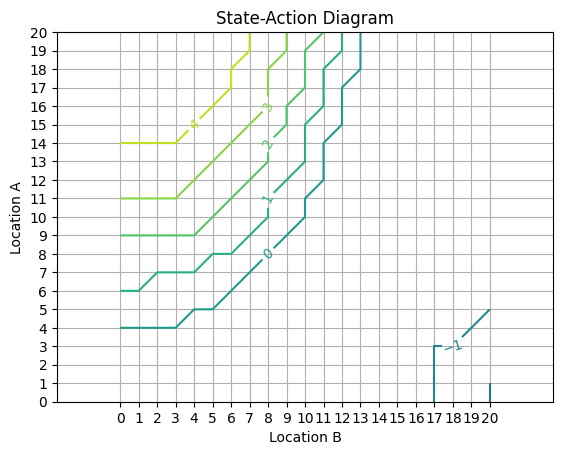

In [ ]:
method=PolicyIterationSolver()
method.policy_iteration()
CS = plt.contour(method.policy, levels=range(-6, 6))
plt.clabel(CS)
plt.xlim([0, 20])
plt.ylim([0, 20])
plt.axis('equal')
plt.xticks(range(21))
plt.yticks(range(21))
plt.grid('on')
plt.title('State-Action Diagram')
plt.xlabel('Location B')
plt.ylabel('Location A')
plt.show()

Calculate poisson ...
Calculate poisson ...
[ 0.          9.81684361 18.90106167 26.52002861 32.18532741 35.89695806
 38.04565419 39.15239397 39.66373013 39.87736447 39.9586869  39.98708456
 39.99623685 39.99897402 39.99973731 39.99993662 39.99998555 39.99999688
 39.99999936 39.99999987 39.99999998]
276.4480004339697
127.48602070786177
70.53098985067334
46.442719147175296
31.812348436741956
22.349657096335932
15.564191615583127
10.691983863652979
7.268461620060691
4.875346418222819
3.273586493057792
2.1905463966130583
1.4599527206467542
0.9700492165587775
0.642984789434422
0.42541730059633664
0.28108138771278846
0.18552020590482243
0.12234689914498631
0.08063280538851814
0.05311345381528554
0.0349716232612991
0.023018700108877965
0.015147039144267183
0.009965045525632377


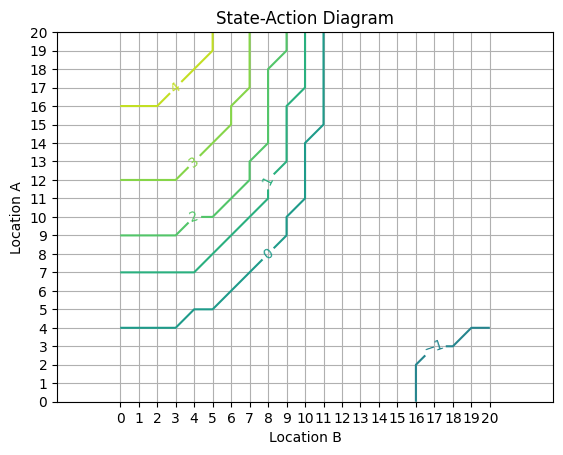

In [ ]:
solver = ValueIterationSolver()
solver.value_iteration()
CS = plt.contour(solver.policy, levels=range(-6, 6))
plt.clabel(CS)
plt.xlim([0, 20])
plt.ylim([0, 20])
plt.axis('equal')
plt.xticks(range(21))
plt.yticks(range(21))
plt.title('State-Action Diagram')
plt.xlabel('Location B')
plt.ylabel('Location A')
plt.grid('on')
plt.show()

# Refrences
- Reinforcement Learning:An Introduction, second edition, Richard S. Sutton and Andrew G. Barto
- Pieter Abbeel YouTube talk on Fundations of deep Reinforcement learning
- https://github.com/zy31415/jackscarrental
- https://github.com/msdkang/Reinforcement-Learning